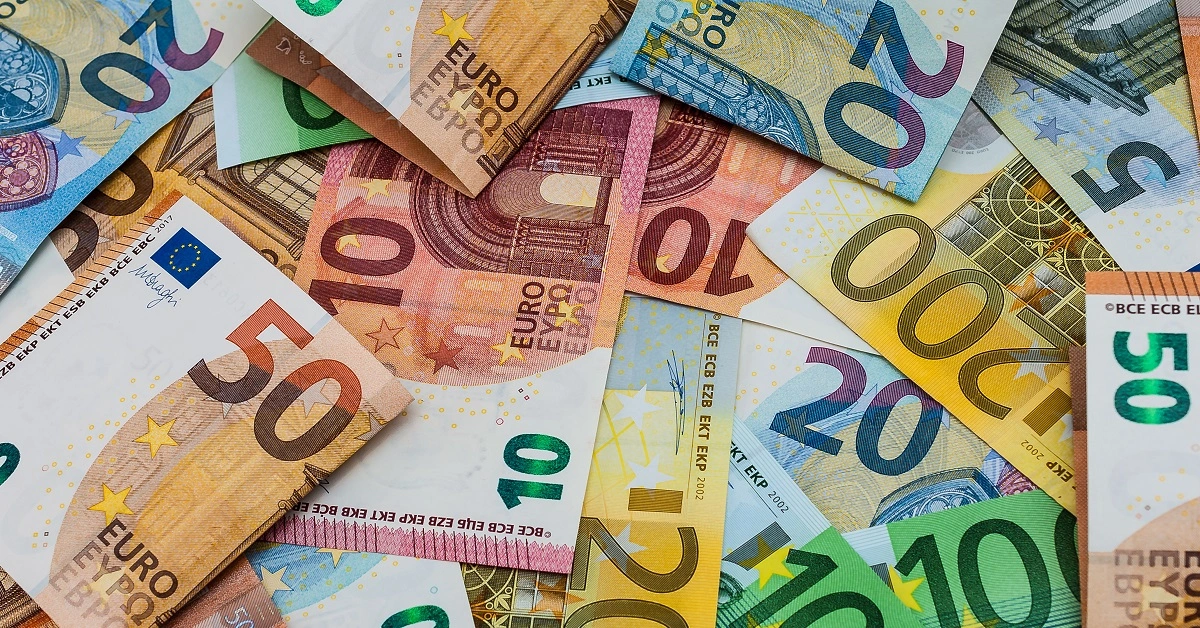

In [1]:
import PIL
from PIL import Image
img=Image.open(r'C:\Users\yugan\Downloads\banknote-authentication.jpg')
img

# Bank Note Analysis

**Data Set Information:**

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

**Attribute Information:**

**Dataset:** https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

**UCI:** http://archive.ics.uci.edu/ml/datasets/banknote+authentication

### Can we classify banknote as fake or genuine?

In [2]:
#importing all the libraries
from pyforest import*

In [3]:
#libraries imported
lazy_imports()

['from sklearn.linear_model import LassoCV',
 'import fbprophet',
 'from PIL import Image',
 'from fbprophet import Prophet',
 'from scipy import signal as sg',
 'from pyspark import SparkContext',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.manifold import TSNE',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.preprocessing import StandardScaler',
 'from scipy import stats',
 'import matplotlib as mpl',
 'import fastai',
 'from sklearn import svm',
 'from dask import dataframe as dd',
 'from sklearn.preprocessing import OneHotEncoder',
 'import pickle',
 'from sklearn.model_selection import KFold',
 'from sklearn.preprocessing import MinMaxScaler',
 'import cv2',
 'import sklearn',
 'from sklearn.impute import SimpleImputer',
 'import matplotlib.pyplot as plt',
 'import seaborn as sns',
 'import gensim',
 'import tqdm',
 'from sklearn.preprocessing import LabelEncoder',
 'import glob',
 'import plotly.express as px',
 'import os',


In [4]:
df=pd.read_csv('BankNote_Authentication.csv')

<IPython.core.display.Javascript object>

In [5]:
df.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [6]:
df.shape

(1372, 5)

In [7]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [8]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [9]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

### Visualizations

**Univariate Data Analysis**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\yugan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


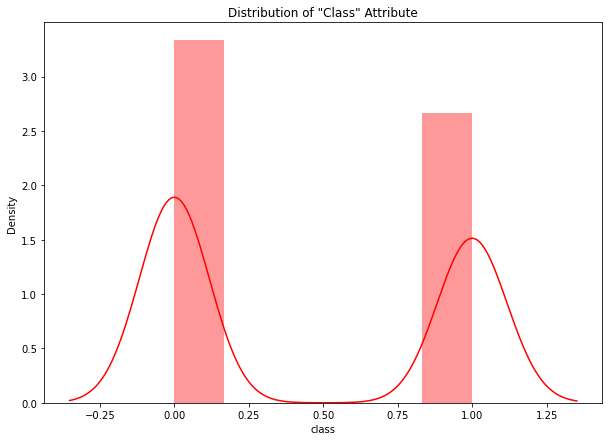

In [10]:
plt.figure(figsize=(10,7));
plt.title('Distribution of "Class" Attribute');
sns.distplot(df['class'],color='red');

**Multivariate data analysis**

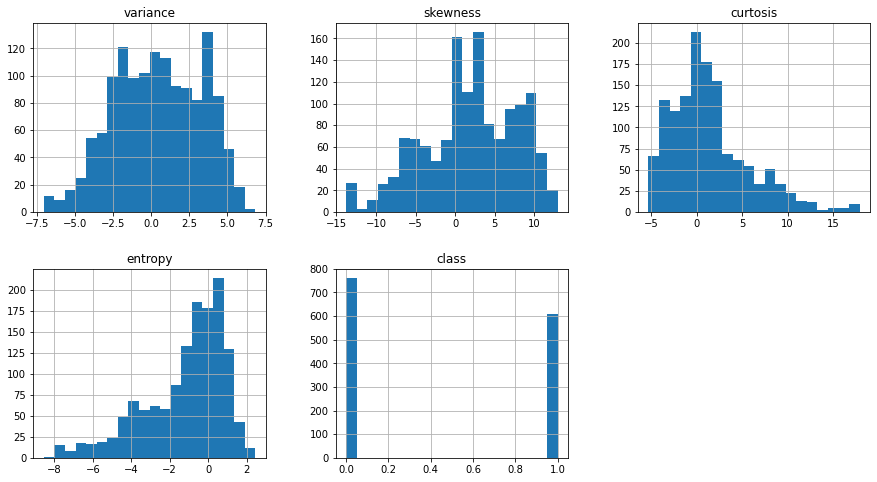

In [11]:
#Histogram of all plots
df.hist(bins=20,figsize=(15,8),layout=(2,3)); 

In [12]:
import warnings 
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

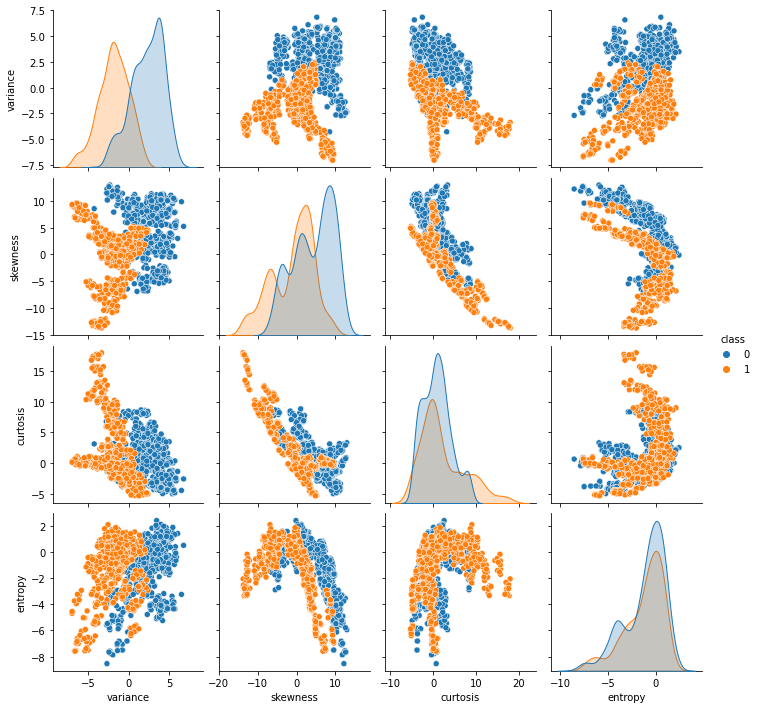

In [13]:
sns.pairplot(df,hue='class')

### Preparing Our Data To Build Our Model

In [14]:
#defining features & target variables 
X=df.drop(['class'],axis=1)
y=df['class']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

**Scaling our Data**


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [18]:
y_train.head()

1226    1
1085    1
148     0
1178    1
478     0
Name: class, dtype: int64

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

classifier=LogisticRegression(solver='liblinear',random_state=1)
classifier.fit(X_train,y_train)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n",accuracies)

Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [20]:
print("Mean Accuracy:",accuracies.mean())

Mean Accuracy: 0.9835863219349459


In [24]:
y_test_pred=classifier.predict(X_test)

In [25]:
y_test_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [26]:
accuracy_score(y_test,y_test_pred)

0.9745454545454545

Confusion Matrix For Logistic Regression


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

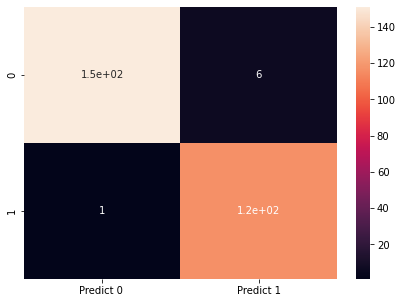

In [27]:
from sklearn import metrics 
print("Confusion Matrix For Logistic Regression")
cm=metrics.confusion_matrix(y_test,y_test_pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],
                  columns=[i for i in ["Predict 0 ","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

### Support Vector Machine

In [29]:
from sklearn.svm import SVC

svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)

svm_accuracies=cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n",svm_accuracies)

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [30]:
svm_pred=svm_classifier.predict(X_test)

print("Mean Accuracy: ",svm_accuracies.mean())

Mean Accuracy:  0.9854045037531277


In [31]:
accuracy_score(y_test,svm_pred)

0.9818181818181818

Confusion Matrix For svm_pred


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

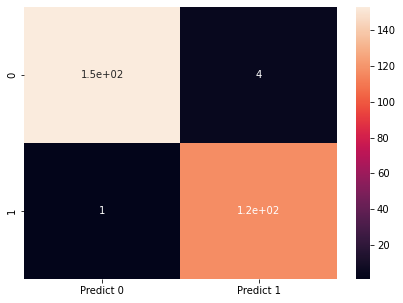

In [32]:
print("Confusion Matrix For svm_pred")
cm=metrics.confusion_matrix(y_test,svm_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Support Vector Machine (rbf)

Kernels in SVM classification refer to the function that is responsible for defining the decision boundaries between the classes. Apart from the classic linear kernel which assumes that the different classes are separated by a straight line, a RBF (radial basis function) kernel is used when the boundaries are hypothesized to be curve-shaped.

RBF kernel uses two main parameters, gamma and C that are related to:

1.the decision region (how spread the region is),     and
2.the penalty for misclassifying a data point
  respectively

In [33]:
from sklearn.svm import SVC

svm_rbf_classifier=SVC(kernel='rbf',gamma='auto')
svm_rbf_classifier.fit(X_train,y_train)

svm_rbf_accuracies=cross_val_score(estimator=svm_rbf_classifier,X=X_test,y=y_test,cv=10)
print("Accuracies:\n",svm_rbf_accuracies)
print("Mean Accuracy: ",svm_rbf_accuracies.mean())

Accuracies:
 [1.         0.96428571 1.         1.         1.         1.
 0.96296296 1.         1.         1.        ]
Mean Accuracy:  0.9927248677248677


In [34]:
svm_rbf_pred=svm_rbf_classifier.predict(X_test)

accuracy_score(y_test,svm_rbf_pred)

1.0

Confusion Matrix For svm_rbf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

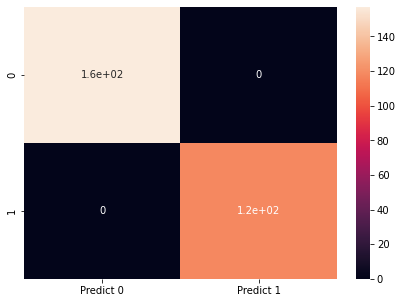

In [35]:
print("Confusion Matrix For svm_rbf")
cm=metrics.confusion_matrix(y_test,svm_rbf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rdf_classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
rdf_classifier.fit(X_train,y_train)
rdf_accuracies=cross_val_score(estimator=rdf_classifier,X=X_test,y=y_test,cv=10)
 
print("Accuracies:\n",rdf_accuracies)
print("Mean Accuracy: ",rdf_accuracies.mean())

Accuracies:
 [0.96428571 1.         0.89285714 0.96428571 1.         0.96296296
 1.         0.96296296 1.         1.        ]
Mean Accuracy:  0.9747354497354497


In [37]:
rdf_pred=rdf_classifier.predict(X_test)

accuracy_score(y_test,rdf_pred)

0.9963636363636363

Confusion Matrix For Random Forest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

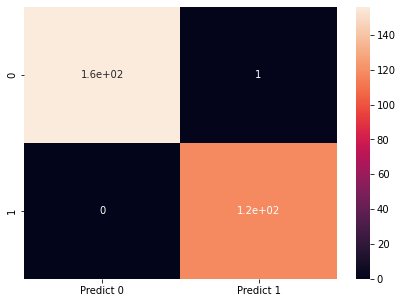

In [38]:
print("Confusion Matrix For Random Forest")
cm=metrics.confusion_matrix(y_test,rdf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### KNeighborsClassifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [42]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [43]:
final_KNN_model=grid.best_estimator_

In [44]:
KNN = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2 )

In [45]:
# Call Nearest Neighbour algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [46]:
KNN_predicted = KNN.predict(X_test)

accuracy_score(y_test,KNN_predicted)

1.0

Confusion Matrix For KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

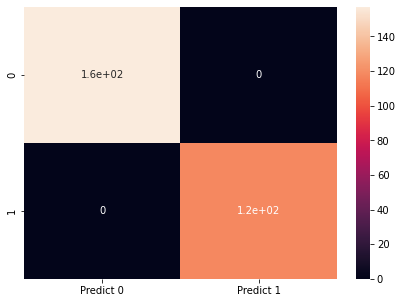

In [47]:
print("Confusion Matrix For KNN")
cm=metrics.confusion_matrix(y_test,KNN_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Multilayer Perceptron

In [48]:
from sklearn.neural_network import MLPClassifier
multi_classifier=MLPClassifier(hidden_layer_sizes=(8,4), max_iter=4000, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
multi_classifier.fit(X_train,y_train)
multi_accuracies=cross_val_score(estimator=multi_classifier,X=X_test,y=y_test,cv=10)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

In [49]:
print("Accuracies:\n",multi_accuracies)
print("Mean Accuracy: ",multi_accuracies.mean())

Accuracies:
 [1.         1.         1.         1.         0.96428571 1.
 1.         1.         1.         1.        ]
Mean Accuracy:  0.9964285714285716


In [50]:
multi_predicted = multi_classifier.predict(X_test)

In [51]:
accuracy_score(y_test,multi_predicted)

1.0

Confusion Matrix For MLPClassifier


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

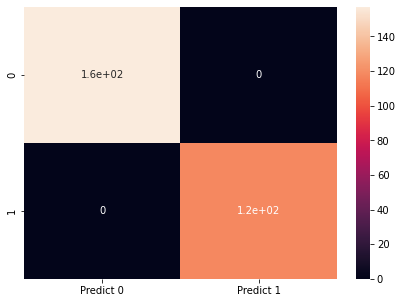

In [52]:
print("Confusion Matrix For MLPClassifier")
cm=metrics.confusion_matrix(y_test,multi_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Printing each Algorithm and the accuracy score

In [54]:
print("LogisticRegression:", accuracy_score(y_test,y_test_pred))
print("Support Vector Machine (using kernel=linear):", accuracy_score(y_test,svm_pred))
print("Support Vector Machine (using kernel=rbf):", accuracy_score(y_test,svm_rbf_pred))
print("RandomForestClassifier:", accuracy_score(y_test,rdf_pred))
print("KNeighborsClassifier:", accuracy_score(y_test,KNN_predicted))
print("MLPClassifier:", accuracy_score(y_test,multi_predicted))

LogisticRegression: 0.9745454545454545
Support Vector Machine (using kernel=linear): 0.9818181818181818
Support Vector Machine (using kernel=rbf): 1.0
RandomForestClassifier: 0.9963636363636363
KNeighborsClassifier: 1.0
MLPClassifier: 1.0


It can be seen that Support Vector Machine (using kernel=rbf), KNeighborsClassifier: 1.0 and MLPClassifier: 1.0 are having hightest accuracy score of 100% and RandomForestClassifier is also doing very great with accuracy score of 99%

These can also be verified from the confusion matrix